In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("doge-usd-max.csv")
df['snapped_at'] = pd.to_datetime(df['snapped_at'])
df['snapped_at'] = df['snapped_at'].dt.strftime('%Y-%m-%d')
df.head()

,snapped_at,price,market_cap,total_volume
0,2013-12-15,0.000559,3488670.0,0.0
1,2013-12-17,0.000218,1619159.0,0.0
2,2013-12-18,0.000268,2191987.0,0.0
3,2013-12-19,0.000475,4299422.0,0.0
4,2013-12-20,0.000989,9866232.0,0.0


In [3]:
df.tail()

,snapped_at,price,market_cap,total_volume
3839,2024-06-22,0.124026,1.795764e+10,6.392249e+08
3840,2024-06-23,0.123764,1.792525e+10,3.471529e+08
3841,2024-06-24,0.122069,1.767437e+10,4.421210e+08
3842,2024-06-25,0.119147,1.724747e+10,9.854685e+08
3843,2024-06-26,0.126122,1.824382e+10,8.117187e+08


In [4]:
df.describe()

,price,market_cap,total_volume
count,3844.000000,3.843000e+03,3.844000e+03
mean,0.043194,5.801260e+09,6.347884e+08
std,0.078237,1.038799e+10,2.448936e+09
min,0.000087,1.619159e+06,0.000000e+00
25%,0.000287,2.730898e+07,3.812246e+05
50%,0.002650,3.229552e+08,4.912433e+07
75%,0.068508,9.274379e+09,3.954661e+08
max,0.681842,8.879477e+10,5.096065e+10


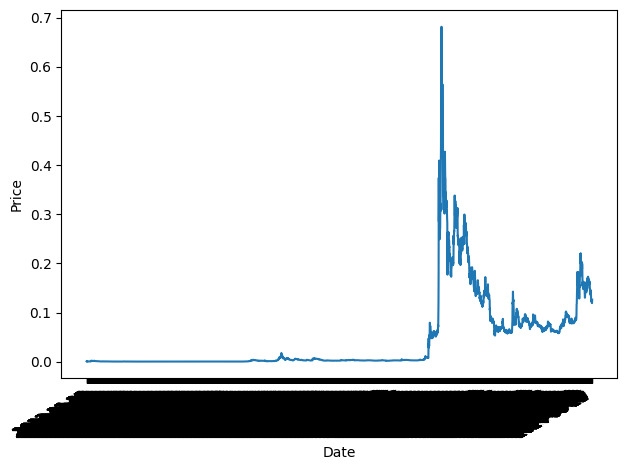

In [5]:
fig, ax = plt.subplots()

ax.plot(df["snapped_at"], df["price"])
ax.set_xlabel("Date")
ax.set_ylabel("Price")
# ax.axvspan(2056, 2421, color='#808080', alpha=0.2)

# plt.xticks(np.arange(53, 2421,365))

fig.autofmt_xdate()
plt.tight_layout()

Is this Random Walk?


In [6]:
ADF_result = adfuller(df['price'])

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -3.509069185503732
p-value: 0.007757210209165234


p-value is less than 0.05 so series is stationary


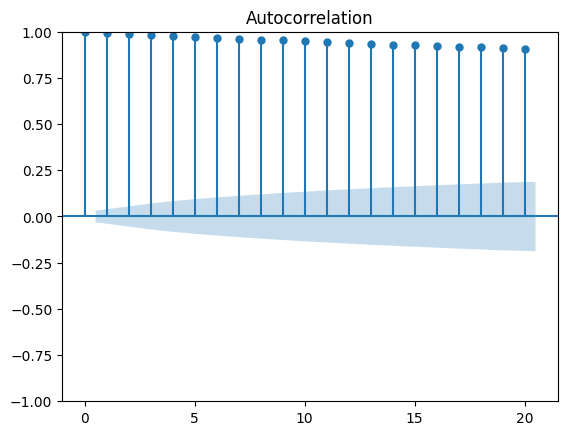

In [13]:
plot_acf(df['price'], lags=20);